# CIFAR-10

CIFAR-10 dataset: http://www.cs.toronto.edu/~kriz/cifar.html

#### Cieľ zadania: Klasifikácia obrázku jednej z nasledujúcich tried:
• 0: airplane\
• 1: automobile\
• 2: bird\
• 3: cat\
• 4: deer\
• 5: dog\
• 6: frog\
• 7: horse\
• 8: ship\
• 9: truck

In [21]:
from matplotlib import pyplot
from keras.datasets import cifar10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import wandb
from wandb.keras import WandbCallback

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
def countValues(data):
    unique_vals, counts = np.unique(data, return_counts=True)

    for val, count in zip(unique_vals, counts):
        print("Value {}: {} occurrences".format(val, count))

In [23]:
def dataNormalisation(data):
    return data.astype('float32') / 255.0

In [24]:
mode = 1

In [25]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

if(mode == 0):
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_val.shape, y_val.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [26]:
X_train = dataNormalisation(X_train)
X_val = dataNormalisation(X_val)
if (mode == 0):
    X_test = dataNormalisation(X_test)

In [27]:
countValues(y_train)

Value 0: 5000 occurrences
Value 1: 5000 occurrences
Value 2: 5000 occurrences
Value 3: 5000 occurrences
Value 4: 5000 occurrences
Value 5: 5000 occurrences
Value 6: 5000 occurrences
Value 7: 5000 occurrences
Value 8: 5000 occurrences
Value 9: 5000 occurrences


In [28]:
countValues(y_val)

Value 0: 1000 occurrences
Value 1: 1000 occurrences
Value 2: 1000 occurrences
Value 3: 1000 occurrences
Value 4: 1000 occurrences
Value 5: 1000 occurrences
Value 6: 1000 occurrences
Value 7: 1000 occurrences
Value 8: 1000 occurrences
Value 9: 1000 occurrences


### Dáta:
• RGB obrázky v rozmeroch 32x32x3\
• obrázky rozdelené do 10 tried\
Trénovacích vzoriek: 50000 - každá trieda má 5000 vzoriek\
Testovacích vzoriek: 10000 - každá trieda má 1000 vzoriek

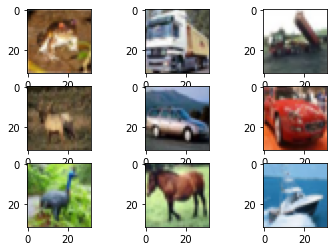

In [41]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i])
plt.show()

In [30]:
print('Class:')
for i in range(9):
    print(y_train[i])

Class:
[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]


• 0: airplane\
• 1: automobile\
• 2: bird\
• 3: cat\
• 4: deer\
• 5: dog\
• 6: frog\
• 7: horse\
• 8: ship\
• 9: truck

Normalizacia dat - hodnoty pixelov jednotlivych obrazkov stlacime do intervalu 0 - 1.\
Better gradient propagation - stability of gradient \
Faster convergence - because normalization can help to reduce the scale difference between features \
Robustness to input variations - network can be made more invariant to variations in lighting, contrast, and other image properties

Augmentacia dat, zvysenie poctu obrazkov o dvojnasobok

In [31]:
if(mode == 0):
    # Define the data augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1)

    # Generate augmented images and labels
    augmented_images = []
    augmented_labels = []
    for i in range(X_train.shape[0]):
        # Generate augmented image
        augmented_image = datagen.random_transform(X_train[i])
        # Append augmented image to list of augmented images
        augmented_images.append(augmented_image)
        # Append corresponding label to list of augmented labels
        augmented_labels.append(y_train[i])

    # Convert the list of augmented images and labels to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    # Concatenate original images and labels with augmented images and labels
    X_train = np.concatenate((X_train, augmented_images))
    y_train = np.concatenate((y_train, augmented_labels))

    # Plot the original and augmented images
    fig, axes = plt.subplots(5, 2, figsize=(8, 20))
    for i in range(5):
        # Plot the original image
        axes[i, 0].imshow(X_train[i])
        axes[i, 0].set_title(f"Original image (class {y_train[i][0]})")

        # Plot the augmented image
        axes[i, 1].imshow(augmented_images[i])
        axes[i, 1].set_title("Augmented image")
    plt.show()

In [32]:
if(mode == 0):
    print(X_train.shape)
    print(y_train.shape)

In [33]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(y_train)
testY = tf.keras.utils.to_categorical(y_val)

In [34]:
print(testY[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [35]:
print(y_val[1])

[8]


In [36]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3132 - accuracy: 0.5309 - val_loss: 1.0786 - val_accuracy: 0.6208
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9569 - accuracy: 0.6674 - val_loss: 0.9945 - val_accuracy: 0.6541
Epoch 3/10
 688/1563 [============>.................] - ETA: 30s - loss: 0.7916 - accuracy: 0.7272


KeyboardInterrupt



Augmentovany a normalizovany dataset

In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))